In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

regdata = np.load('regularization_test_ZM_2240_sessdate_2020-01-22_fitdate_2020-07-05.p', allow_pickle=True)
regfits = regdata['regularizations']
spk_clu = regdata['spk_clu']
spk_times = regdata['spk_times']
trialsdf = regdata['trialsdf']
dscores = [regfits[key][0].score() for key in sorted(regfits.keys())]

In [2]:
import ipywidgets as iw
from brainbox.plot import peri_event_time_histogram
cells = regfits[0][1]['stimonL'].index.to_list()
kernels = list(regfits[0][1].keys())

@iw.interact
def plot_fits(cell=cells, kernel=kernels):
    if kernel[:-1] == 'stimon':
        side = 'contrastLeft' if kernel[-1] == 'L' else 'contrastRight'
        times = trialsdf[np.isfinite(trialsdf[side])].stimOn_times.values
    elif kernel[-4:] == 'rect':
        fdbk = 1 if kernel == 'correct' else -1
        times = trialsdf[trialsdf['feedbackType'] == fdbk].feedback_times

    fig, ax = plt.subplots(4, 1, figsize=(12, 18))
    peri_event_time_histogram(spk_times, spk_clu, times, cell, t_before=0., t_after=0.6, bin_size=0.02, ax=ax[0],
                              error_bars='sem')
    colors = sns.cubehelix_palette(20, start=2, rot=0, dark=0, light=.8)

    for alpha, (_, fits) in regfits.items():
        color = colors.pop()
        if alpha == 0:
            ax[1].plot(fits[kernel].loc[cell], color=color)
        else:
            ax[2].plot(fits[kernel].loc[cell], color=color)
    cellscores = [x[cell] for x in dscores]
    ax[3].plot(sorted(regfits.keys()), cellscores)
    ax[3].set_title('Deviance squared score for each alpha')
    plt.tight_layout()

interactive(children=(Dropdown(description='cell', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 16, 17, …

In [33]:
longseries = [pd.DataFrame(np.pad(x.values.reshape(-1, 1), ((0, 0), (0, 1)), constant_values=reg) , columns=['scores', 'alpha']) for x, reg in zip(dscores, regfits.keys())]

In [57]:
scoresdf = pd.concat(longseries)
rectdf = pd.concat(dscores, axis=1)
rectdf.columns = regfits.keys()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 <a list of 20 Text major ticklabel objects>)

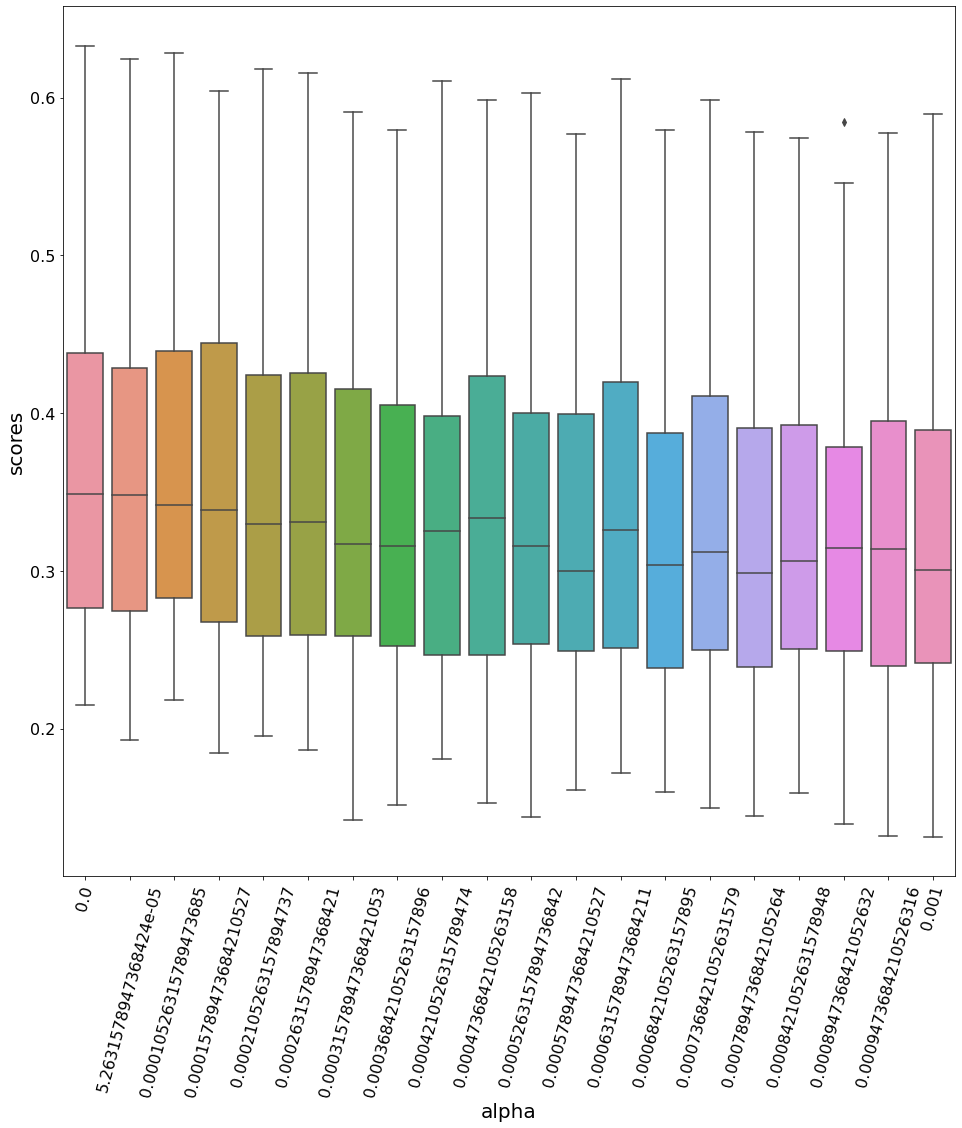

In [58]:
goodunits = longseries[0].index[longseries[0]['scores'] > 0.2]
badunits = longseries[0].index[~longseries[0].index.isin(goodunits)]
testdf = scoresdf[scoresdf.index.isin(goodunits)]
plt.figure(figsize=(16, 16))
sns.boxplot(x='alpha', y='scores', data=testdf)
plt.xticks(rotation=75)

Text(0, 0.5, '$D^2$')

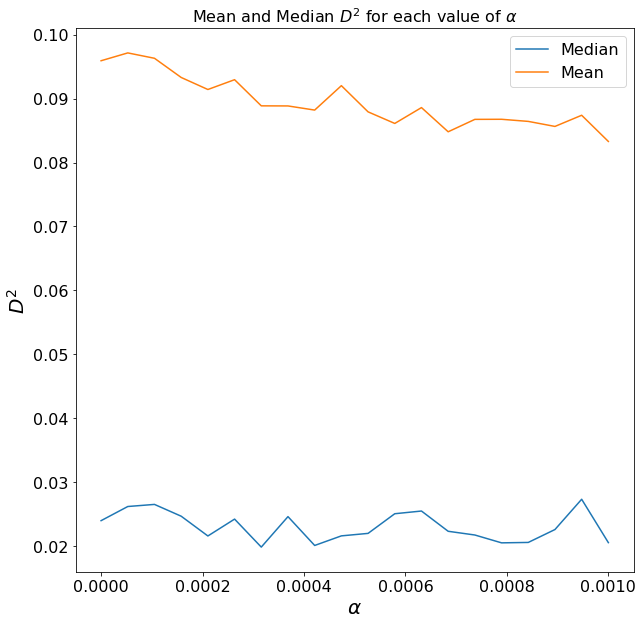

In [59]:
plt.figure(figsize=(10, 10))
plt.plot(rectdf.median(), label='Median')
plt.plot(rectdf.mean(), label='Mean')
plt.legend()
plt.title(r'Mean and Median $D^2$ for each value of $\alpha$')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$D^2$')

In [56]:
rectdf.median()

0.0      0.023953
5.263    0.026166
0.000    0.026495
0.000    0.024649
0.000    0.021556
0.000    0.024195
0.000    0.019815
0.000    0.024584
0.000    0.020070
0.000    0.021571
0.000    0.021961
0.000    0.025037
0.000    0.025460
0.000    0.022289
0.000    0.021706
0.000    0.020479
0.000    0.020544
0.000    0.022563
0.000    0.027301
0.001    0.020513
dtype: float64